In [1]:
#sklearn imports
import sklearn
from sklearn import preprocessing, neighbors
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

#matplotlib imports
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

#other imports
import pandas as pd
import numpy as np
import random, os
import csv
from typing import Tuple

rng = 1

def seed_everything(seed=1):
    """"
    Seed everything.
    """   
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
print('The scikit-learn version is {}.'.format(sklearn.__version__))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

rng = 1

The scikit-learn version is 0.24.2.


In [2]:
#read in train/test data
df = pd.read_csv('..\..\data\_All_Receptors_runs_1_2_3_binary.csv')
df = df[['Hits', 'max_feat', 'avg_feat', 'max_centr', 'min_centr', 'avg_centr', 'features', 'all_same', 's_score', 'hyd_prop', 'don_prop', 'catdon_prop', 'hydaro_prop', 'aniacc_prop', 'quality']]
df.fillna(-99999)

predictors = list(df.columns)
predictors = predictors[:-1]

print('Predictors:', predictors,'\n')


#split data into quality/not quality sets
q_ph4s = df[df['quality'] == 1]
nq_ph4s = df[df['quality'] != 1]

#ensure that there is an equal number of nq ph4s
nq_ph4s = nq_ph4s.sample(n=1*len(q_ph4s), random_state = rng)
#print(type(nq_ph4s))
#print(nq_ph4s['Hits'].head())
#print(nq_ph4s['Hits'].tail())

#merge arrays prior to TTS
frames = [q_ph4s, nq_ph4s]
df = pd.concat(frames)

#x is features, y is classes
x = df.drop('quality', axis=1)
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rng)

Predictors: ['Hits', 'max_feat', 'avg_feat', 'max_centr', 'min_centr', 'avg_centr', 'features', 'all_same', 's_score', 'hyd_prop', 'don_prop', 'catdon_prop', 'hydaro_prop', 'aniacc_prop'] 



C:\Users\Greg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


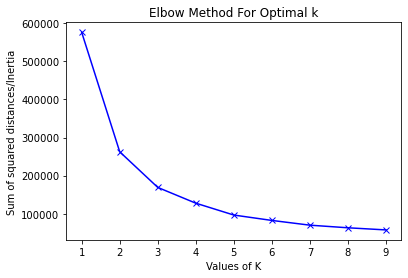

In [3]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x_test)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

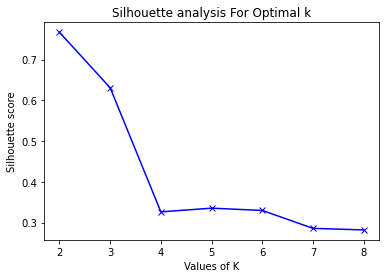

In [6]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_test)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(x_test, cluster_labels))


plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()